In [39]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [40]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/validation'

In [42]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [43]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [ ]:
print(train)

In [44]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

happy completed
sad completed
fear completed
surprise completed
neutral completed
angry completed
disgust completed


In [ ]:
# print(test)
# print(test['image'])

print(test.shape)
print(train.shape)

In [45]:
from tqdm.notebook import tqdm

In [46]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale' )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [47]:
train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

  0%|          | 0/7066 [00:00<?, ?it/s]

In [48]:
x_train = train_features/255.0
x_test = test_features/255.0

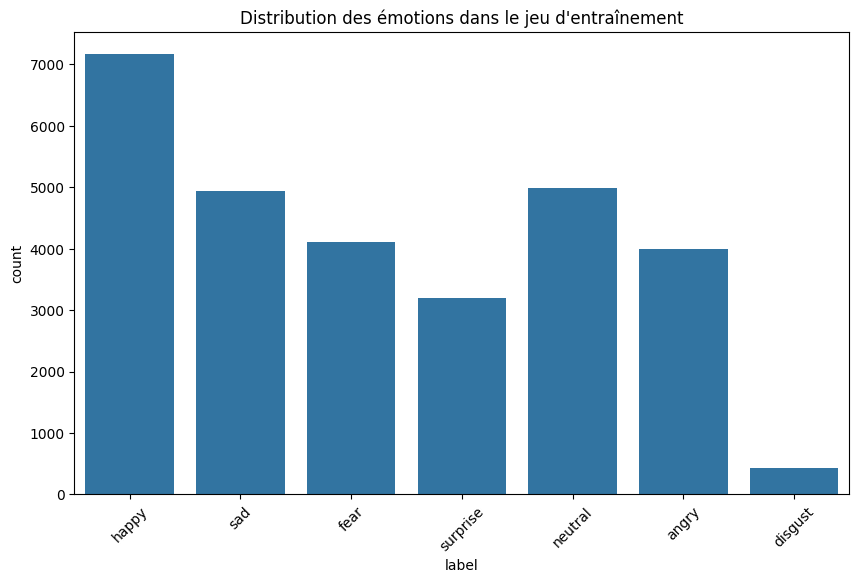

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train)
plt.title('Distribution des émotions dans le jeu d\'entraînement')
plt.xticks(rotation=45)
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
print(train['label'])

In [52]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2

model = Sequential([
    # Premier bloc
    Conv2D(32, (3,3), padding='same', input_shape=(48,48,1)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Conv2D(32, (3,3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Deuxième bloc
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Conv2D(64, (3,3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Troisième bloc
    Conv2D(128, (3,3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Conv2D(128, (3,3), padding='same'),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    # Couches fully connected
    Flatten(),
    Dense(512, kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

/Users/thibault/Documents/ESIEE/Projet/IA_project/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/thibault/Documents/ESIEE/Projet/IA_project/.venv/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [54]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.2,
        patience=5,
        min_lr=0.00001
    ),
    ModelCheckpoint(
        'best_model.keras',
        monitor='val_accuracy',
        save_best_only=True
    )
]

# Compilation
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entraînement
history = model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=100,
    validation_data=(x_test, y_test),
    callbacks=callbacks
)

Epoch 1/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 59s 65ms/step - accuracy: 0.2274 - loss: 10.4998 - val_accuracy: 0.3851 - val_loss: 7.2301 - learning_rate: 1.0000e-04
Epoch 2/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 59s 65ms/step - accuracy: 0.3317 - loss: 6.7068 - val_accuracy: 0.4325 - val_loss: 4.6551 - learning_rate: 1.0000e-04
Epoch 3/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 58s 64ms/step - accuracy: 0.3886 - loss: 4.3914 - val_accuracy: 0.4723 - val_loss: 3.1414 - learning_rate: 1.0000e-04
Epoch 4/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 58s 65ms/step - accuracy: 0.4388 - loss: 3.0474 - val_accuracy: 0.5082 - val_loss: 2.3482 - learning_rate: 1.0000e-04
Epoch 5/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 60s 66ms/step - accuracy: 0.4659 - loss: 2.3475 - val_accuracy: 0.5306 - val_loss: 1.9394 - learning_rate: 1.0000e-04
Epoch 6/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 60s 67ms/step - accuracy: 0.4963 - loss: 1.9698 - val_accuracy: 0.5272 - val_loss: 1.7852 - learning_rate: 1.0000e-04
Epoch 7/100
901/901 ━━━━━━━━━━━━━━━━━━━━ 60s 

In [56]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Trouver les classes réelles
true_classes = np.argmax(y_test, axis=1)

# Calculer le pourcentage de réussite
accuracy = np.mean(predicted_classes == true_classes) * 100
print(f"accuracy : {accuracy:.2f}%")

221/221 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
accuracy : 65.60%


In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [ ]:
print(x_train.shape)
print(y_train.shape)

In [ ]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 30, validation_data = (x_test,y_test))
model.save('modelIA.h5')

In [ ]:

from tensorflow.keras.models import load_model

# Charger directement le modèle enregistré au lieu d'utiliser un fichier JSON
model = load_model("facialemotionmodel.h5")
print("Modèle chargé avec succès.")

# Optionnel : Afficher le résumé du modèle pour vérifier
model.summary()


In [23]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [24]:
def ef(image):
    img = load_img(image,color_mode='grayscale' )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/disgust/299.jpg'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [ ]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

# Trouver les classes réelles
true_classes = np.argmax(y_test, axis=1)

# Calculer le pourcentage de réussite
accuracy = np.mean(predicted_classes == true_classes) * 100
print(f"Accuracy : {accuracy:.2f}%")